# **DSI Applied Workshop**
### Today we'll be working with **sklearn, pandas, geopandas, and matplotlib**

In [1]:
import geopandas as gpd
import pandas as pd

from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

import numpy as np

In [4]:
data = pd.read_csv("Data_with_Depression.csv").drop(['Pop', 'Unnamed: 0'], axis=1)
data = data.rename(columns={"Shannon_Weiner" : "Diversity Entropy", "Percent_H" : "Percent_Hispanic"})
data.head()

,index,Traffic,Hospitals,Police Officers,HealthCare Services,No Emergency Room Services,Dedicated Emergency Department,Number of Roads,Percent_Male,Percent_Hispanic,Percent_WA,Percent_BA,Diversity Entropy,Unemployment_rate_2022,Median_Household_Income_2021,Fentanyl_deaths_2022,Sheriff Officers,Fire Departments per 100000,Hospitalization_From_Depression
0,Alachua,0.578098,0.136077,0.427792,0.499743,0.163293,0.088005,0.244657,0.482864,0.114210,0.697993,0.203845,0.548851,0.595745,0.591642,6.689434,0.290436,0.132995,0.579364
1,Baker,0.520957,0.556055,0.000000,0.300991,0.556055,0.449520,0.483072,0.514765,0.037838,0.833435,0.127792,0.360248,0.595745,0.644335,21.580405,0.834052,0.403923,0.161983
2,Bay,0.731112,0.208768,0.558753,0.377264,0.250521,0.135016,0.321729,0.497024,0.079424,0.812849,0.118001,0.421648,0.574468,0.634954,8.102239,0.521558,0.209553,0.492026
3,Bradford,0.500313,0.283015,0.556081,0.318175,0.000000,0.457584,0.527372,0.531395,0.048548,0.781642,0.180171,0.412292,0.659574,0.580074,7.322520,0.598486,0.336411,0.513182
4,Brevard,0.389528,0.147076,0.440632,0.402143,0.122564,0.138714,0.179622,0.493360,0.120610,0.824617,0.110700,0.400197,0.595745,0.689611,9.830456,0.327896,0.132737,0.629814


In [5]:
matrix = data.drop(['Fentanyl_deaths_2022', 'index', ], axis=1)
y = data['Fentanyl_deaths_2022']

0.8505670835085791


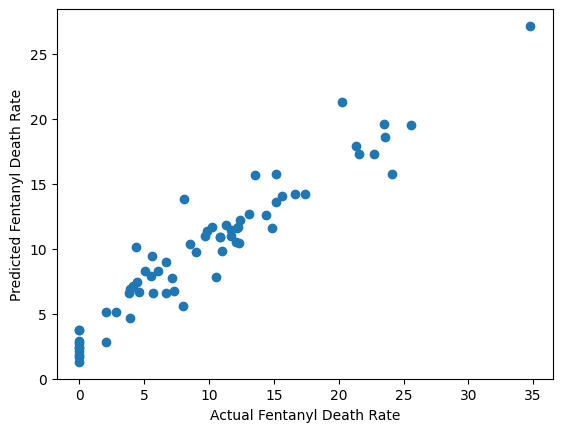

In [13]:
X_train, X_test, y_train, y_test = train_test_split(matrix, y, test_size=0.0001)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
r2 = r2_score(y_train, y_pred)
print(r2)

#plotting the predictions
plt.scatter(y_train, y_pred)
plt.xlabel('Actual Fentanyl Death Rate')
plt.ylabel('Predicted Fentanyl Death Rate')
plt.show()

# Recursive Feature Elimination

In [14]:
model = RandomForestRegressor(n_estimators=100)

# Initialize the RFE model with the logistic regression model and the number of desired features
rfe = RFE(model, step=1)

# Fit the RFE model to your data
rfe.fit(matrix, y)

# Get the selected features
selected_features = rfe.support_

# You can also get the ranking of each feature, where 1 is the most important
feature_ranking = rfe.ranking_
print(feature_ranking)
# Now, you can use the selected features for further analysis
matrix.keys()[selected_features]

[ 1  1  3  7  2  6  1  5  1  9 10  1  8  1  1  4  1]


Index(['Traffic', 'Hospitals', 'Number of Roads', 'Percent_Hispanic',
       'Diversity Entropy', 'Median_Household_Income_2021', 'Sheriff Officers',
       'Hospitalization_From_Depression'],
      dtype='object')

0.8550814335780721


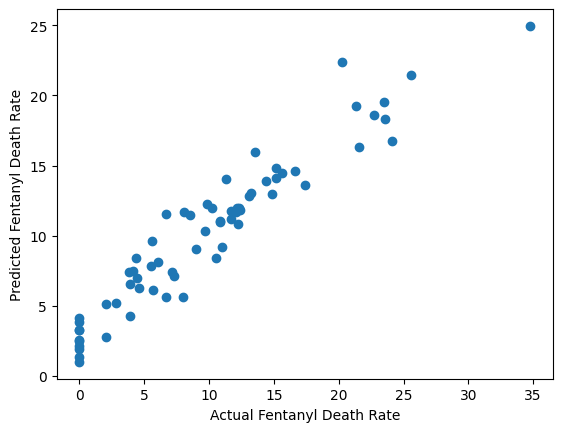

In [18]:
#Training Model with Reduced Dataset
X = data[list(matrix.keys()[selected_features])]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.0001)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
r2 = r2_score(y_train, y_pred)
print(r2)

#plotting the predictions
plt.scatter(y_train, y_pred)
plt.xlabel('Actual Fentanyl Death Rate')
plt.ylabel('Predicted Fentanyl Death Rate')
plt.show()

#Feature Importances
####Using Built-in random forest attributes

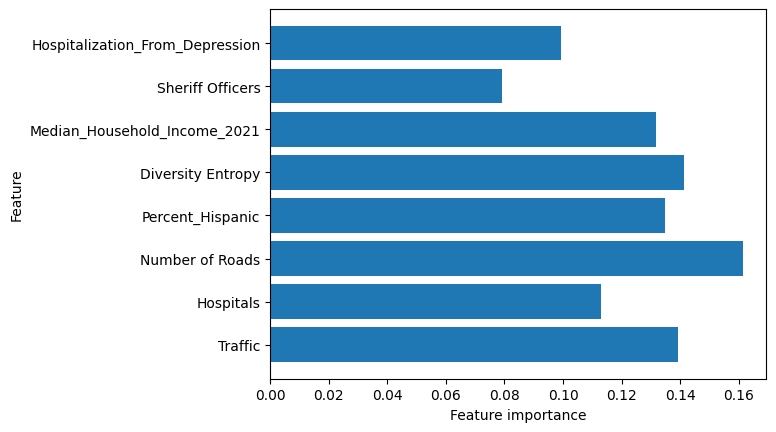

In [19]:
importances = model.feature_importances_
std = np.std([model.feature_importances_ for _ in range(100)], axis=0)
features = X.columns
plt.barh(features, importances, xerr=std, align='center')
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

#Correlation Matrix

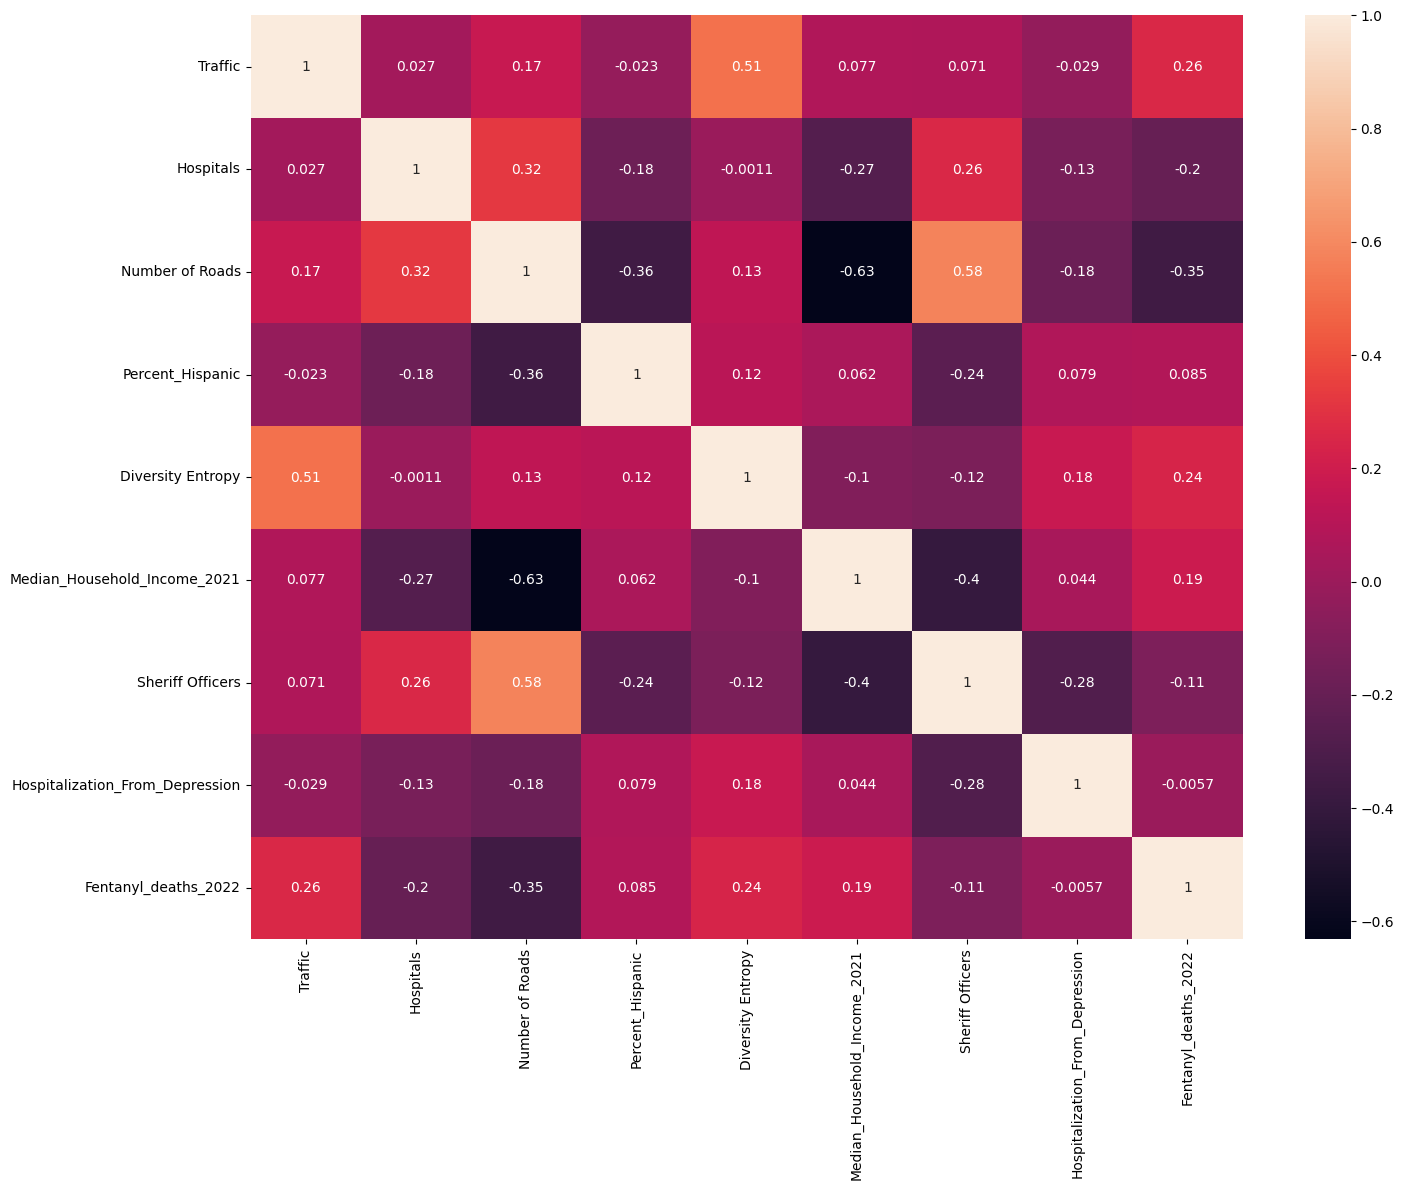

In [20]:
import seaborn as sns

# Correlation plot for chosen features
plt.figure(figsize=(16, 12))
sns.heatmap(data[list(X.columns) + ['Fentanyl_deaths_2022']].corr(), annot=True)
plt.show()

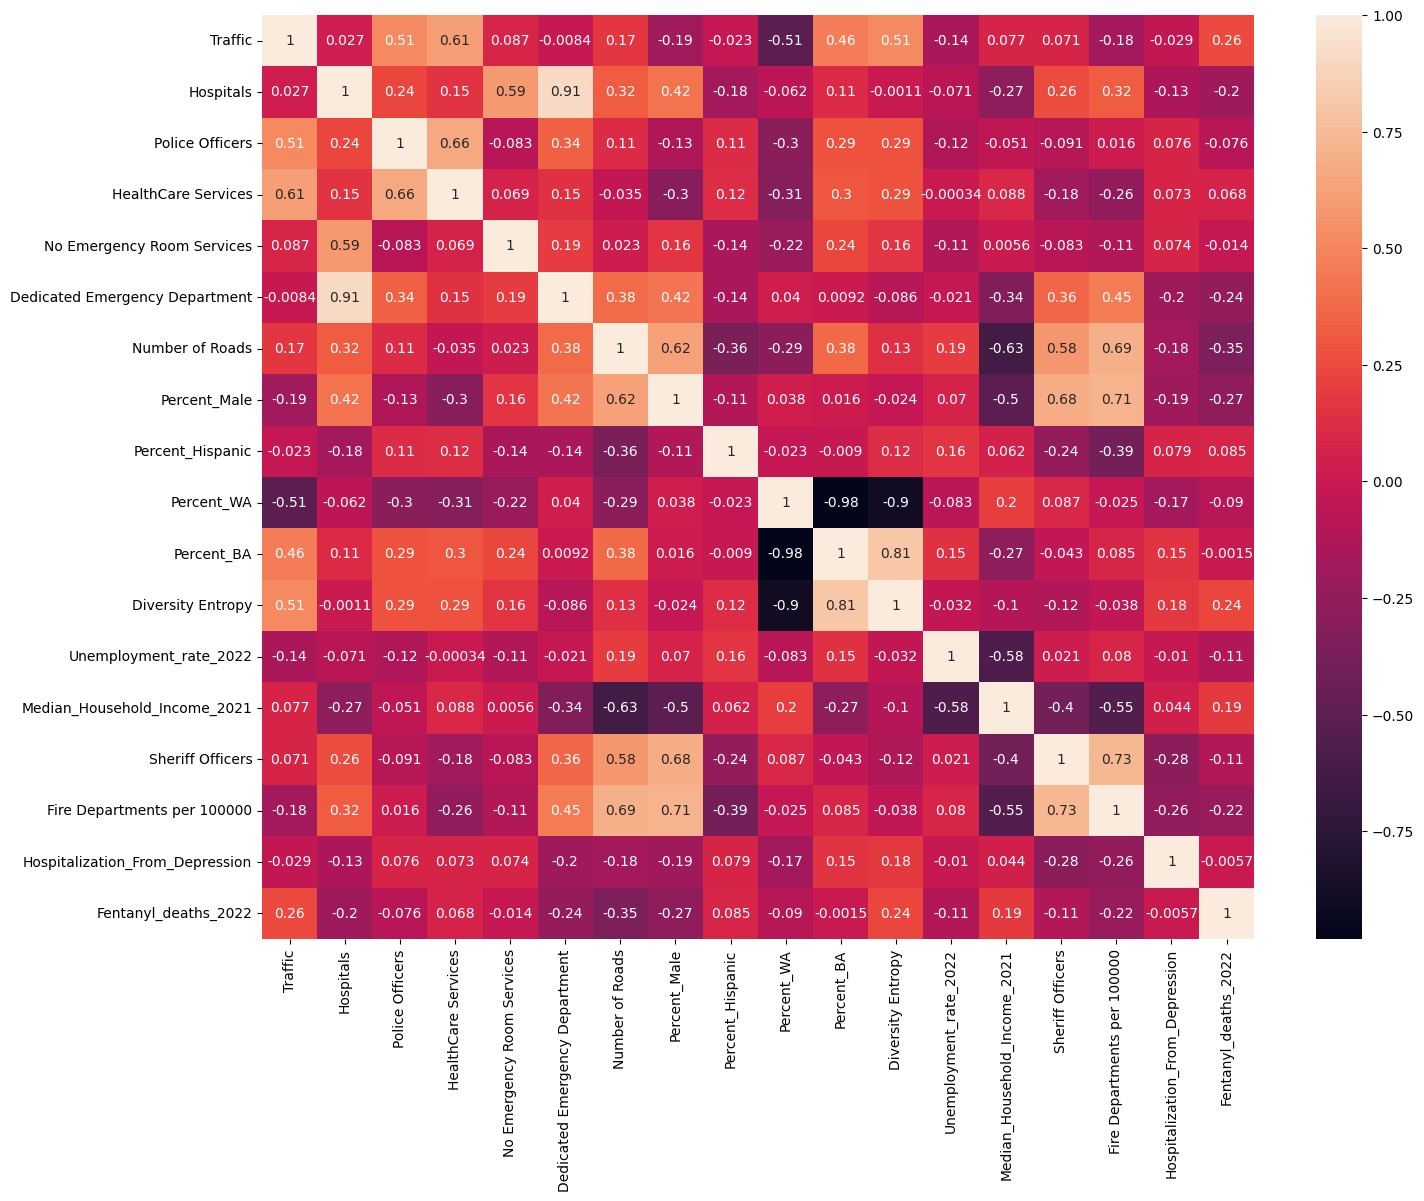

In [21]:
plt.figure(figsize=(16, 12))
sns.heatmap(data[list(matrix.columns) + ['Fentanyl_deaths_2022']].corr(), annot=True)
plt.show()

#Utilizing predictive capabilities of ML Models
####

In [22]:
# Load the geographic data for US counties
county_shapes = gpd.read_file('geojson-fl-counties-fips.json')  # Replace with the path to your geographic data file

county_shapes.head()

,id,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry
0,12083,0500000US12083,12,083,Marion,County,1584.546,"POLYGON ((-82.31170 28.96039, -82.42700 29.021..."
1,12087,0500000US12087,12,087,Monroe,County,983.282,"MULTIPOLYGON (((-80.25058 25.34193, -80.25492 ..."
2,12095,0500000US12095,12,095,Orange,County,903.429,"POLYGON ((-81.65739 28.55312, -81.65811 28.682..."
3,12111,0500000US12111,12,111,St. Lucie,County,571.926,"POLYGON ((-80.67786 27.20599, -80.67861 27.448..."
4,12119,0500000US12119,12,119,Sumter,County,546.933,"POLYGON ((-81.95419 28.96005, -81.95358 28.820..."


In [23]:
# Merge your data with the county shapes data based on county name and state
merged_data = county_shapes.merge(data, left_on=['NAME'], right_on=['index'], how='right')

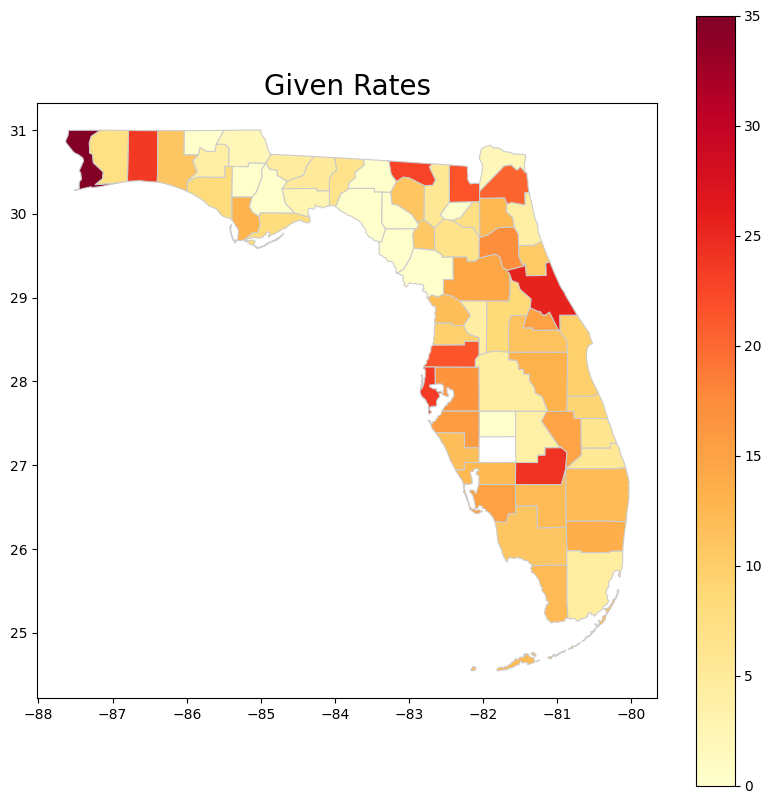

In [26]:
#rates visualized from the data
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged_data.plot(column='Fentanyl_deaths_2022', vmin=0, vmax=35, cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Given Rates', fontsize = 20)

plt.show()

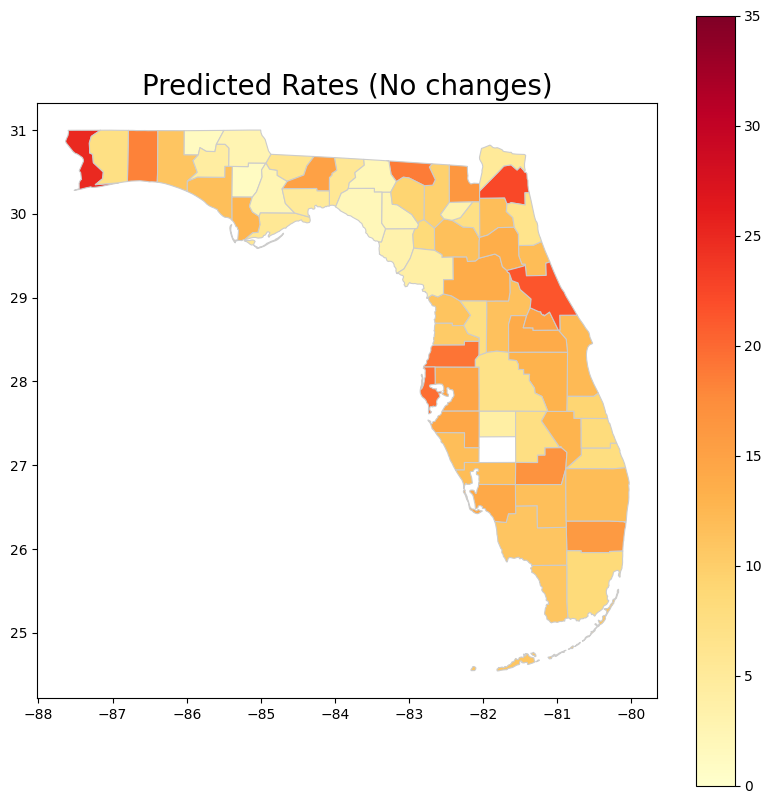

In [27]:
full_pred = model.predict(data[list(matrix.keys()[selected_features])])
merged_data['Fentanyl_deaths_2022'] = full_pred

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged_data.plot(column='Fentanyl_deaths_2022', vmin=0, vmax=35, cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Predicted Rates (No changes)', fontsize = 20)

plt.show()

## **Interactive Predictor (cool)**

In [28]:
from ipywidgets import interactive, widgets
from IPython.display import display

In [30]:
def update_map(threshold, feature):
    # Shift the data based on the threshold
    shifted_data = data.copy()
    shifted_data[feature] = shifted_data[feature] + threshold

    # Predict with the random forest model
    full_pred = model.predict(shifted_data[list(matrix.keys()[selected_features])])
    merged_data['Fentanyl_deaths_2022'] = full_pred

    #plot the new predictions
    fig, ax = plt.subplots(1, 1, figsize=(15, 15))
    merged_data.plot(column='Fentanyl_deaths_2022', vmin=0, vmax=35, cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

    plt.title('Predictions with: ' + feature + ', shifted by: ' + str(threshold), fontsize = 24)
    plt.show()

In [31]:
slider = widgets.FloatSlider(value=0, min=-0.15, max=0.15, step=0.01, description='Threshold')
# Feature dropdown widget
feature_dropdown = widgets.Dropdown(options=data[list(matrix.keys()[selected_features])], value='Number of Roads', description='Feature')


interactive_plot = interactive(update_map, threshold=slider, feature = feature_dropdown)

# Display the interactive plot
output = interactive_plot.children[-1]
output.layout.height = '500px'
display(interactive_plot)

interactive(children=(FloatSlider(value=0.0, description='Threshold', max=0.15, min=-0.15, step=0.01), Dropdow…